In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('final_with_covid_AS.csv')

In [3]:
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54038 entries, 0 to 54037
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       54038 non-null  int64  
 1   BedDys           54038 non-null  int64  
 2   BeddystoCC       54038 non-null  float64
 3   Severity         54038 non-null  int64  
 4   DiedCases        54038 non-null  int64  
 5   DiedBdDys        54038 non-null  int64  
 6   Hsptlsns         54038 non-null  int64  
 7   April            54038 non-null  int64  
 8   August           54038 non-null  int64  
 9   December         54038 non-null  int64  
 10  February         54038 non-null  int64  
 11  January          54038 non-null  int64  
 12  July             54038 non-null  int64  
 13  June             54038 non-null  int64  
 14  March            54038 non-null  int64  
 15  May              54038 non-null  int64  
 16  November         54038 non-null  int64  
 17  October     

In [5]:
a = data['BeddystoCC'].unique()

In [6]:
a.sort()

In [7]:
a

array([  1.        ,   1.04347826,   1.05      , ..., 475.        ,
       562.        , 608.        ])

# Car Driver

In [8]:
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October    

In [9]:
b = filtered_data['BeddystoCC'].unique()
b.sort()
b

array([  1.        ,   1.04347826,   1.05555556, ..., 203.        ,
       255.        , 257.        ])

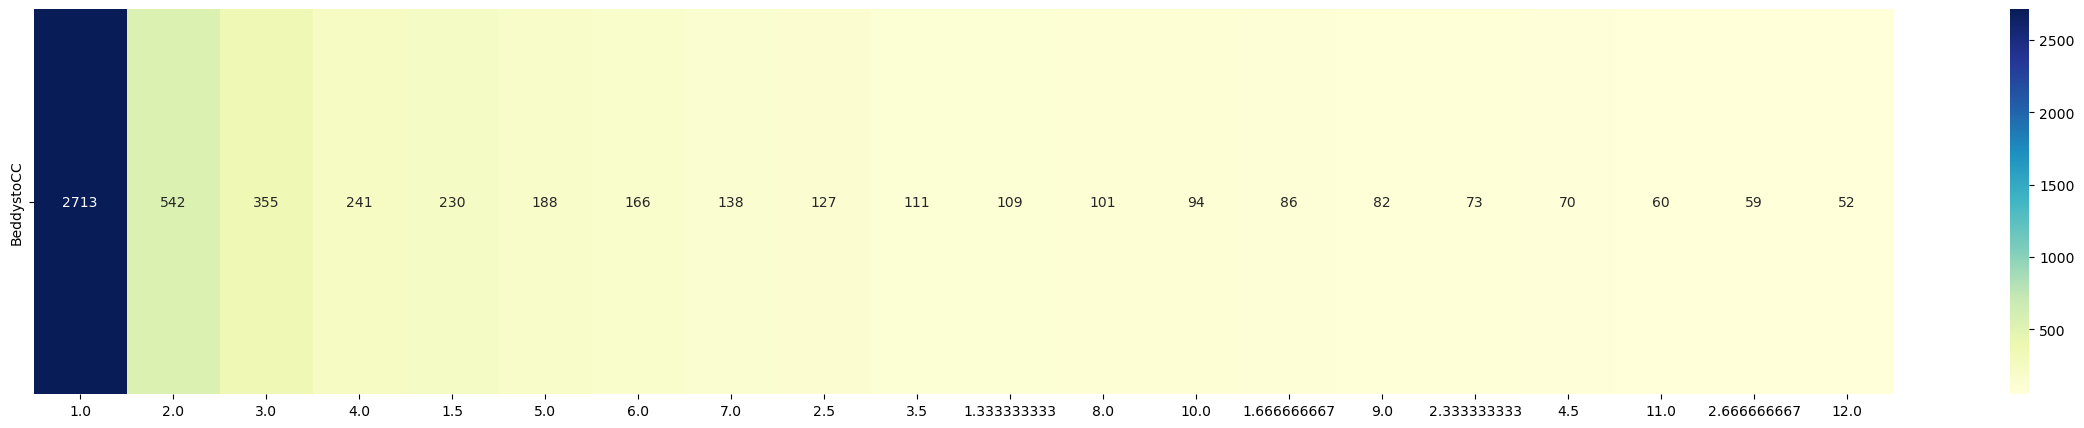

In [10]:


value_counts = filtered_data['BeddystoCC'].value_counts()

N = 20
top_values = value_counts.nlargest(N)

heatmap_data = pd.DataFrame(top_values).T

plt.figure(figsize=(30, 5)) 

sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

plt.show()

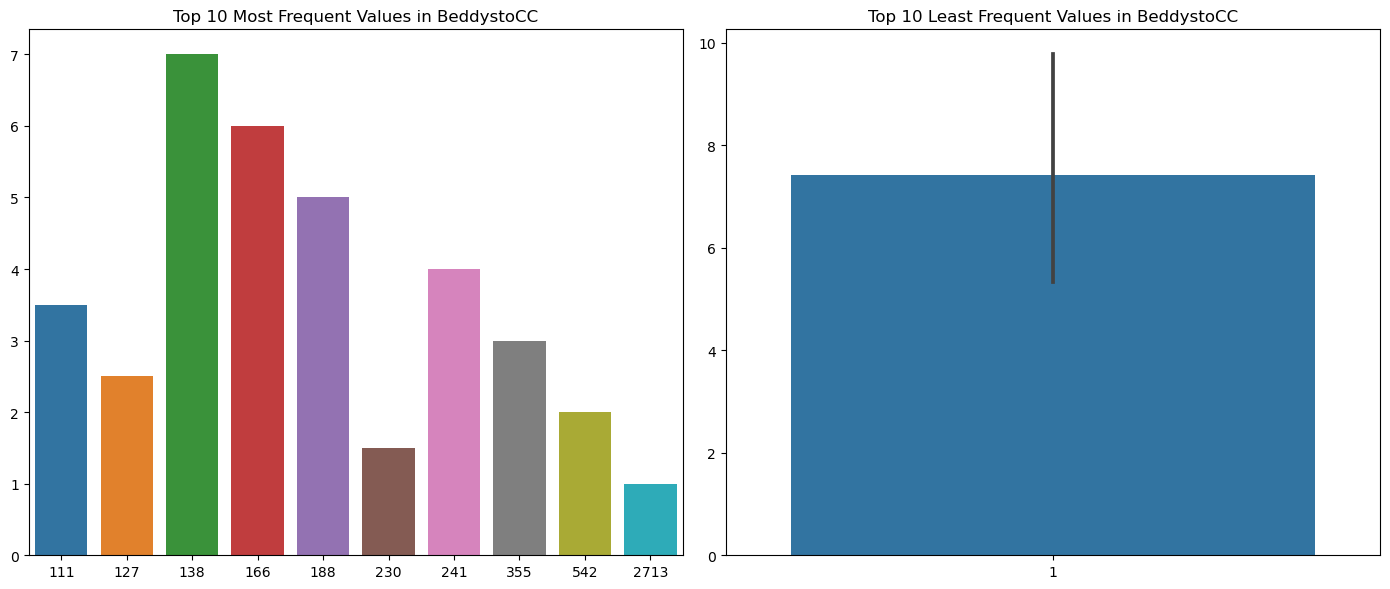

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


value_counts = filtered_data['BeddystoCC'].value_counts()

top_10 = value_counts.nlargest(10)

bottom_10 = value_counts.nsmallest(10)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) 
sns.barplot(x=top_10.values, y=top_10.index)
plt.title('Top 10 Most Frequent Values in BeddystoCC')

plt.subplot(1, 2, 2) 
sns.barplot(x=bottom_10.values, y=bottom_10.index)
plt.title('Top 10 Least Frequent Values in BeddystoCC')

plt.tight_layout()
plt.show()

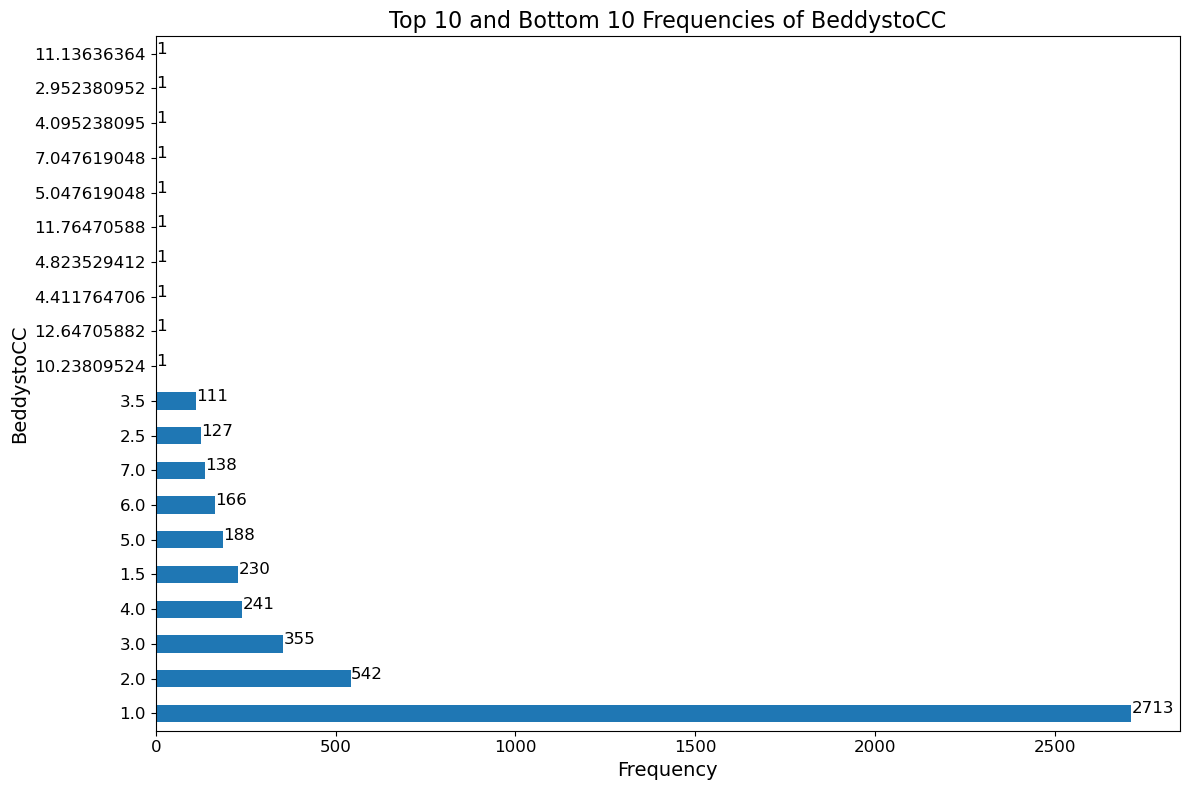

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

frequencies = filtered_data['BeddystoCC'].value_counts()

top_10 = frequencies.nlargest(10)

bottom_10 = frequencies.nsmallest(10)

combined_data = pd.concat([top_10, bottom_10]).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
combined_data.plot(kind='barh', fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('BeddystoCC', fontsize=14)
plt.title('Top 10 and Bottom 10 Frequencies of BeddystoCC', fontsize=16)

for i, v in enumerate(combined_data):
    plt.text(v + 0.1, i, str(v), fontsize=12)

plt.tight_layout()
plt.show()

In [13]:
filtered_data['Bed_days_category'] = np.where(filtered_data['BeddystoCC'] >= 7, 1, 0)
filtered_data['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2410/2810551237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Bed_days_category'] = np.where(filtered_data['BeddystoCC'] >= 7, 1, 0)


0    9688
1    2894
Name: Bed_days_category, dtype: int64

In [14]:
from xgboost import XGBClassifier

X = filtered_data[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'BedDys',
                   'CovidPrd' ]]



y = filtered_data['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.815043156596794
0.7468926553672316
0.7794811320754716
[[2740  150]
 [ 224  661]]
0    9688
1    2894
Name: Bed_days_category, dtype: int64
0.9009271523178808


# Car passenger          

In [15]:
filtered_data2 = data[data['CarPngr'] == 1]
filtered_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11789 entries, 33 to 54030
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11789 non-null  int64  
 1   BedDys           11789 non-null  int64  
 2   BeddystoCC       11789 non-null  float64
 3   Severity         11789 non-null  int64  
 4   DiedCases        11789 non-null  int64  
 5   DiedBdDys        11789 non-null  int64  
 6   Hsptlsns         11789 non-null  int64  
 7   April            11789 non-null  int64  
 8   August           11789 non-null  int64  
 9   December         11789 non-null  int64  
 10  February         11789 non-null  int64  
 11  January          11789 non-null  int64  
 12  July             11789 non-null  int64  
 13  June             11789 non-null  int64  
 14  March            11789 non-null  int64  
 15  May              11789 non-null  int64  
 16  November         11789 non-null  int64  
 17  October    

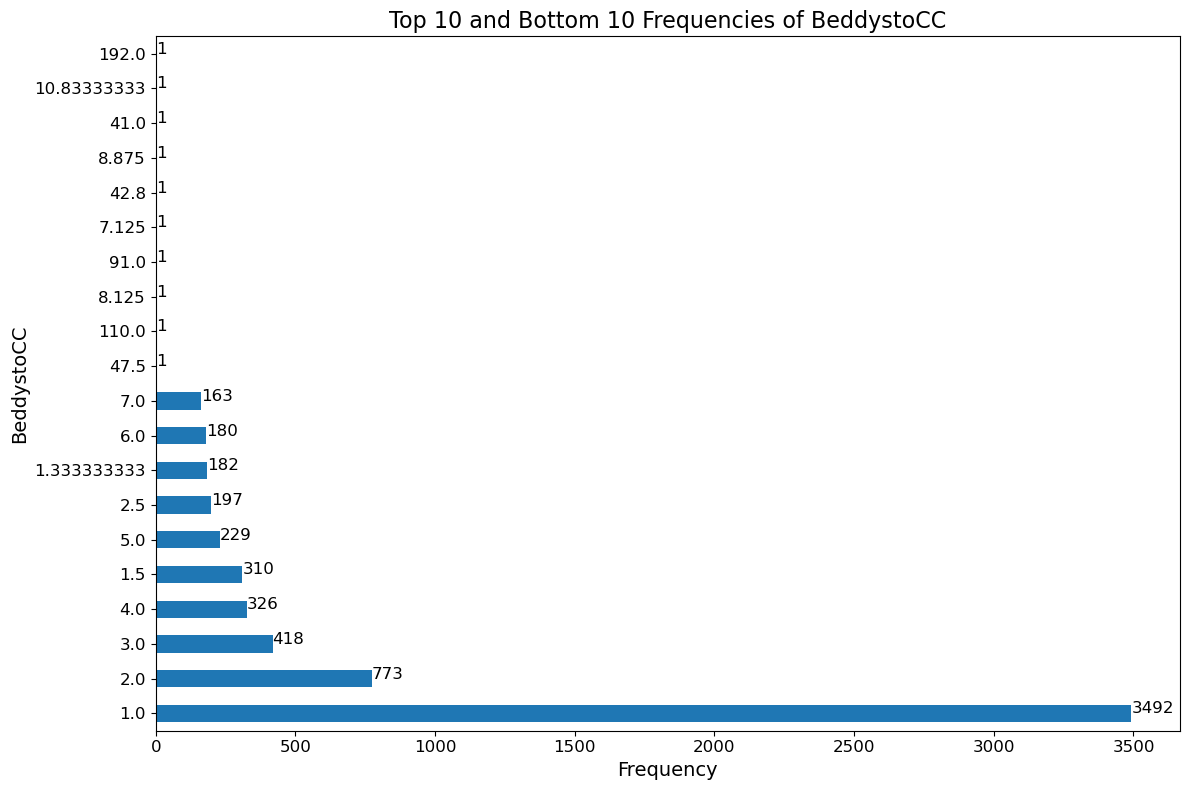

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

frequencies = filtered_data2['BeddystoCC'].value_counts()

top_10 = frequencies.nlargest(10)

bottom_10 = frequencies.nsmallest(10)

combined_data = pd.concat([top_10, bottom_10]).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
combined_data.plot(kind='barh', fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('BeddystoCC', fontsize=14)
plt.title('Top 10 and Bottom 10 Frequencies of BeddystoCC', fontsize=16)

for i, v in enumerate(combined_data):
    plt.text(v + 0.1, i, str(v), fontsize=12)

plt.tight_layout()
plt.show()

In [17]:
filtered_data2['Bed_days_category'] = np.where(filtered_data2['BeddystoCC'] >= 7, 1, 0)
filtered_data2['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2410/1124037408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2['Bed_days_category'] = np.where(filtered_data2['BeddystoCC'] >= 7, 1, 0)


0    9426
1    2363
Name: Bed_days_category, dtype: int64

In [18]:
from xgboost import XGBClassifier

X = filtered_data2[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'BedDys',
                   'CovidPrd' ]]


y = filtered_data2['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.7802359882005899
0.7296551724137931
0.7540983606557377
[[2663  149]
 [ 196  529]]
0    9426
1    2363
Name: Bed_days_category, dtype: int64
0.9024597116200169


# Mtrcyclist

In [19]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
filtered_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11227 entries, 3 to 54034
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11227 non-null  int64  
 1   BedDys           11227 non-null  int64  
 2   BeddystoCC       11227 non-null  float64
 3   Severity         11227 non-null  int64  
 4   DiedCases        11227 non-null  int64  
 5   DiedBdDys        11227 non-null  int64  
 6   Hsptlsns         11227 non-null  int64  
 7   April            11227 non-null  int64  
 8   August           11227 non-null  int64  
 9   December         11227 non-null  int64  
 10  February         11227 non-null  int64  
 11  January          11227 non-null  int64  
 12  July             11227 non-null  int64  
 13  June             11227 non-null  int64  
 14  March            11227 non-null  int64  
 15  May              11227 non-null  int64  
 16  November         11227 non-null  int64  
 17  October     

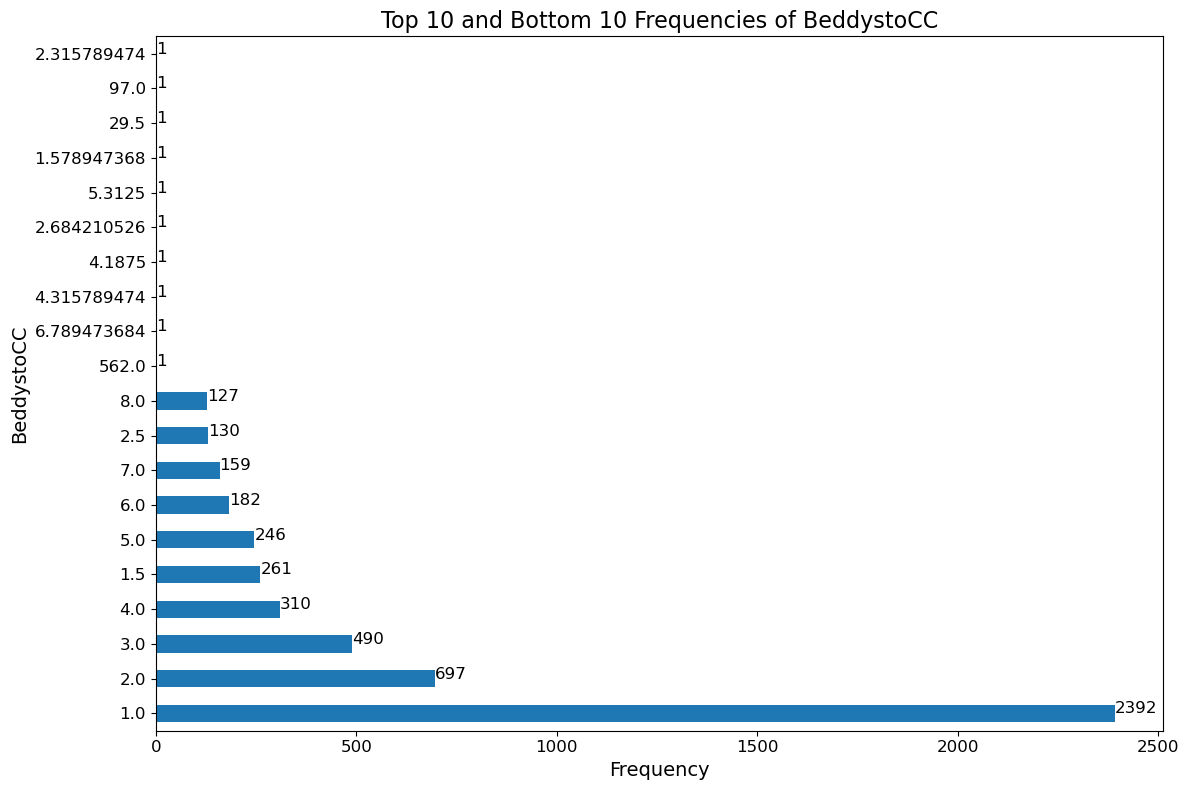

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

frequencies = filtered_data3['BeddystoCC'].value_counts()

top_10 = frequencies.nlargest(10)

bottom_10 = frequencies.nsmallest(10)

combined_data = pd.concat([top_10, bottom_10]).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
combined_data.plot(kind='barh', fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('BeddystoCC', fontsize=14)
plt.title('Top 10 and Bottom 10 Frequencies of BeddystoCC', fontsize=16)

for i, v in enumerate(combined_data):
    plt.text(v + 0.1, i, str(v), fontsize=12)

plt.tight_layout()
plt.show()

In [21]:
filtered_data3['Bed_days_category'] = np.where(filtered_data3['BeddystoCC'] >= 7, 1, 0)
filtered_data3['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2410/1619151574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data3['Bed_days_category'] = np.where(filtered_data3['BeddystoCC'] >= 7, 1, 0)


0    8477
1    2750
Name: Bed_days_category, dtype: int64

In [22]:
from xgboost import XGBClassifier

X = filtered_data3[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'BedDys',
                   'CovidPrd' ]]



y = filtered_data3['Bed_days_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.7796610169491526
0.7456359102244389
0.7622689611217336
[[2398  169]
 [ 204  598]]
0    8477
1    2750
Name: Bed_days_category, dtype: int64
0.8892846542000593


# Pedal cyclist

In [23]:
filtered_data4 = data[data['PdlCyclist'] == 1]
filtered_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12354 entries, 32 to 54035
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12354 non-null  int64  
 1   BedDys           12354 non-null  int64  
 2   BeddystoCC       12354 non-null  float64
 3   Severity         12354 non-null  int64  
 4   DiedCases        12354 non-null  int64  
 5   DiedBdDys        12354 non-null  int64  
 6   Hsptlsns         12354 non-null  int64  
 7   April            12354 non-null  int64  
 8   August           12354 non-null  int64  
 9   December         12354 non-null  int64  
 10  February         12354 non-null  int64  
 11  January          12354 non-null  int64  
 12  July             12354 non-null  int64  
 13  June             12354 non-null  int64  
 14  March            12354 non-null  int64  
 15  May              12354 non-null  int64  
 16  November         12354 non-null  int64  
 17  October    

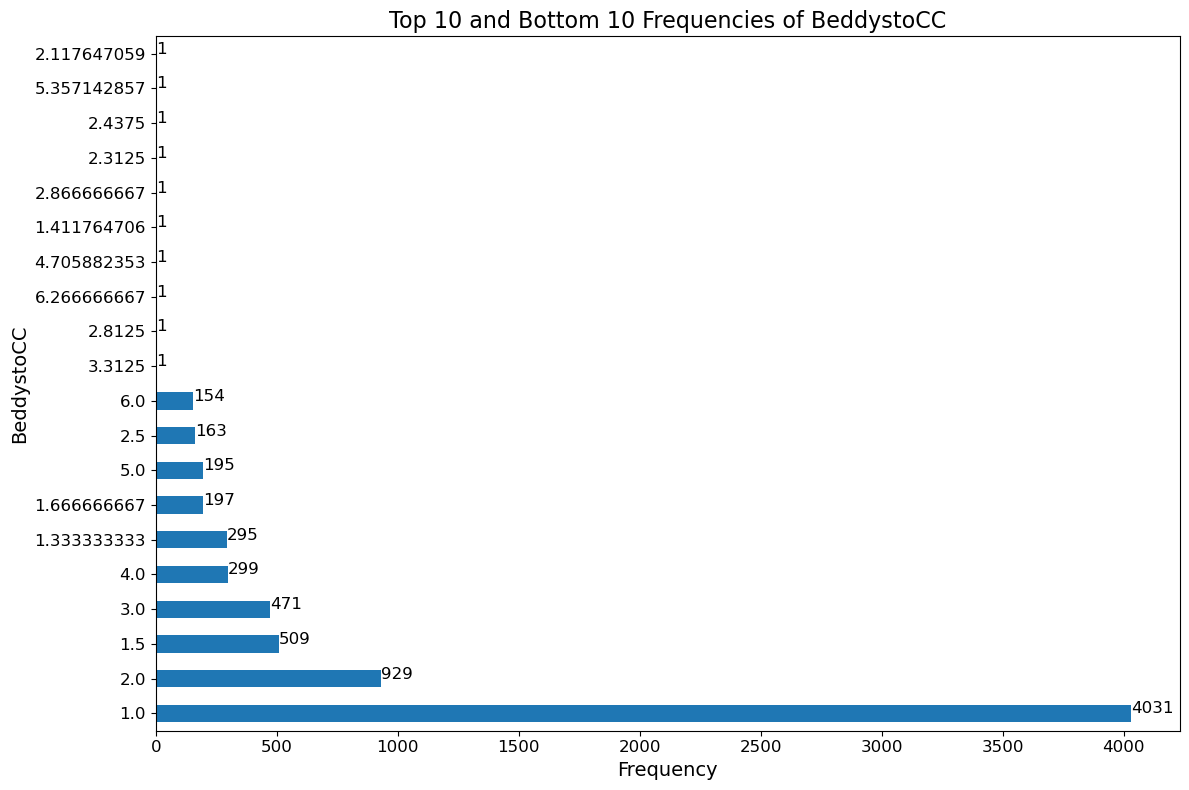

In [24]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

frequencies = filtered_data4['BeddystoCC'].value_counts()

top_10 = frequencies.nlargest(10)

bottom_10 = frequencies.nsmallest(10)

combined_data = pd.concat([top_10, bottom_10]).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
combined_data.plot(kind='barh', fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('BeddystoCC', fontsize=14)
plt.title('Top 10 and Bottom 10 Frequencies of BeddystoCC', fontsize=16)

for i, v in enumerate(combined_data):
    plt.text(v + 0.1, i, str(v), fontsize=12)

plt.tight_layout()
plt.show()

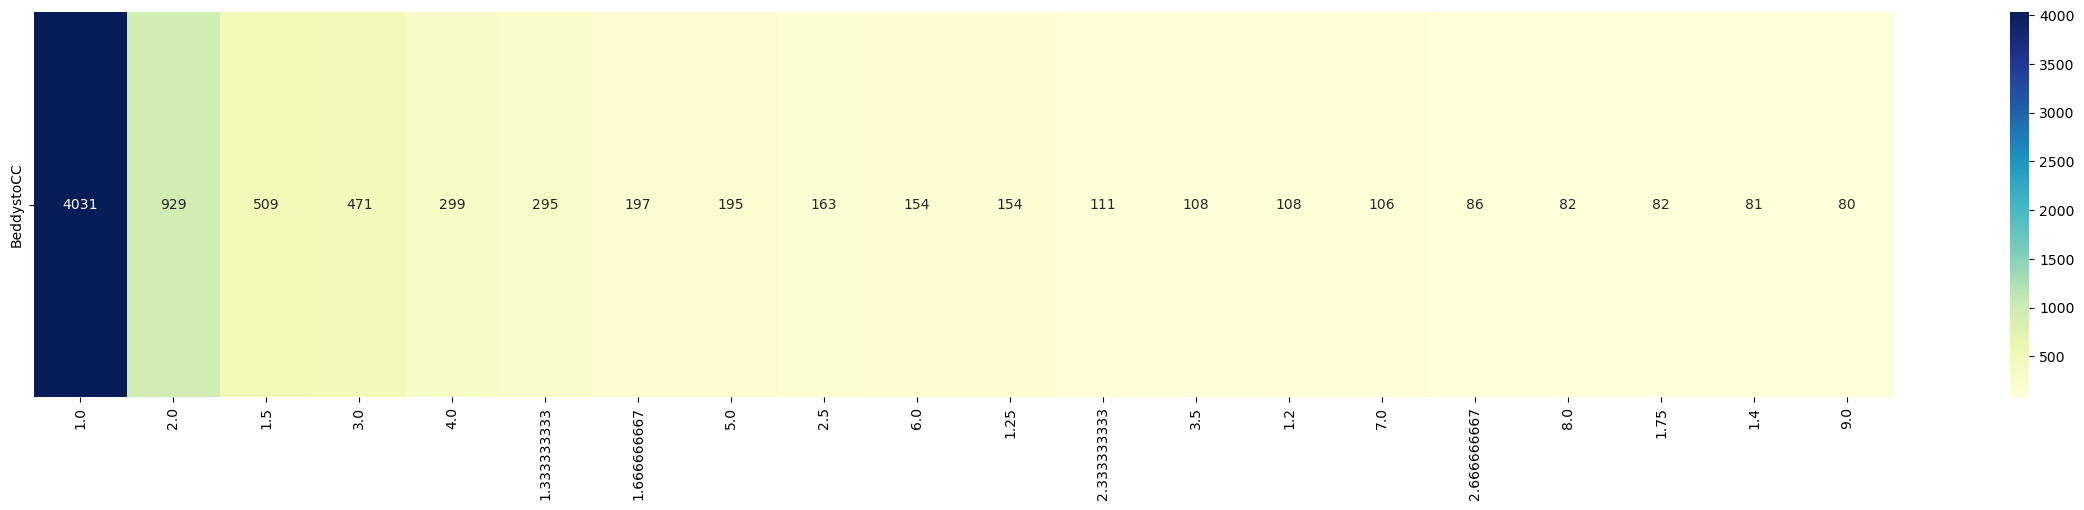

In [25]:


value_counts = filtered_data4['BeddystoCC'].value_counts()

N = 20
top_values = value_counts.nlargest(N)

heatmap_data = pd.DataFrame(top_values).T

plt.figure(figsize=(30, 5)) 

sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

plt.show()

In [26]:
filtered_data4['Bed_days_category'] = np.where(filtered_data4['BeddystoCC'] >= 7, 1, 0)
filtered_data4['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2410/103000103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data4['Bed_days_category'] = np.where(filtered_data4['BeddystoCC'] >= 7, 1, 0)


0    11143
1     1211
Name: Bed_days_category, dtype: int64

In [27]:
from xgboost import XGBClassifier

X = filtered_data4[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'BedDys',
                   'CovidPrd' ]]


y = filtered_data4['Bed_days_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.765625
0.6234096692111959
0.6872370266479663
[[3239   75]
 [ 148  245]]
0    11143
1     1211
Name: Bed_days_category, dtype: int64
0.9398435392500675


# Pedestrian

In [28]:
filtered_data5 = data[data['Pedestrian'] == 1]
filtered_data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6086 entries, 0 to 54037
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       6086 non-null   int64  
 1   BedDys           6086 non-null   int64  
 2   BeddystoCC       6086 non-null   float64
 3   Severity         6086 non-null   int64  
 4   DiedCases        6086 non-null   int64  
 5   DiedBdDys        6086 non-null   int64  
 6   Hsptlsns         6086 non-null   int64  
 7   April            6086 non-null   int64  
 8   August           6086 non-null   int64  
 9   December         6086 non-null   int64  
 10  February         6086 non-null   int64  
 11  January          6086 non-null   int64  
 12  July             6086 non-null   int64  
 13  June             6086 non-null   int64  
 14  March            6086 non-null   int64  
 15  May              6086 non-null   int64  
 16  November         6086 non-null   int64  
 17  October      

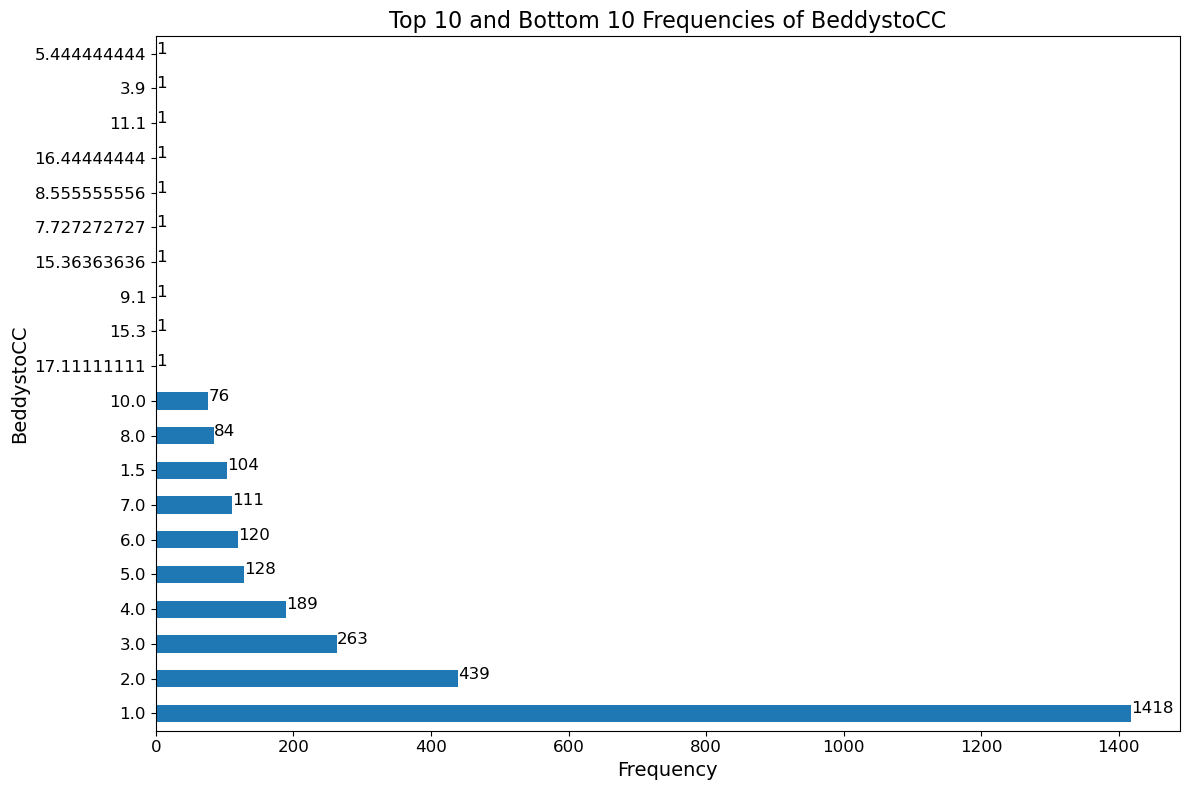

In [29]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

frequencies = filtered_data5['BeddystoCC'].value_counts()

top_10 = frequencies.nlargest(10)

bottom_10 = frequencies.nsmallest(10)

combined_data = pd.concat([top_10, bottom_10]).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
combined_data.plot(kind='barh', fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('BeddystoCC', fontsize=14)
plt.title('Top 10 and Bottom 10 Frequencies of BeddystoCC', fontsize=16)

for i, v in enumerate(combined_data):
    plt.text(v + 0.1, i, str(v), fontsize=12)

plt.tight_layout()
plt.show()

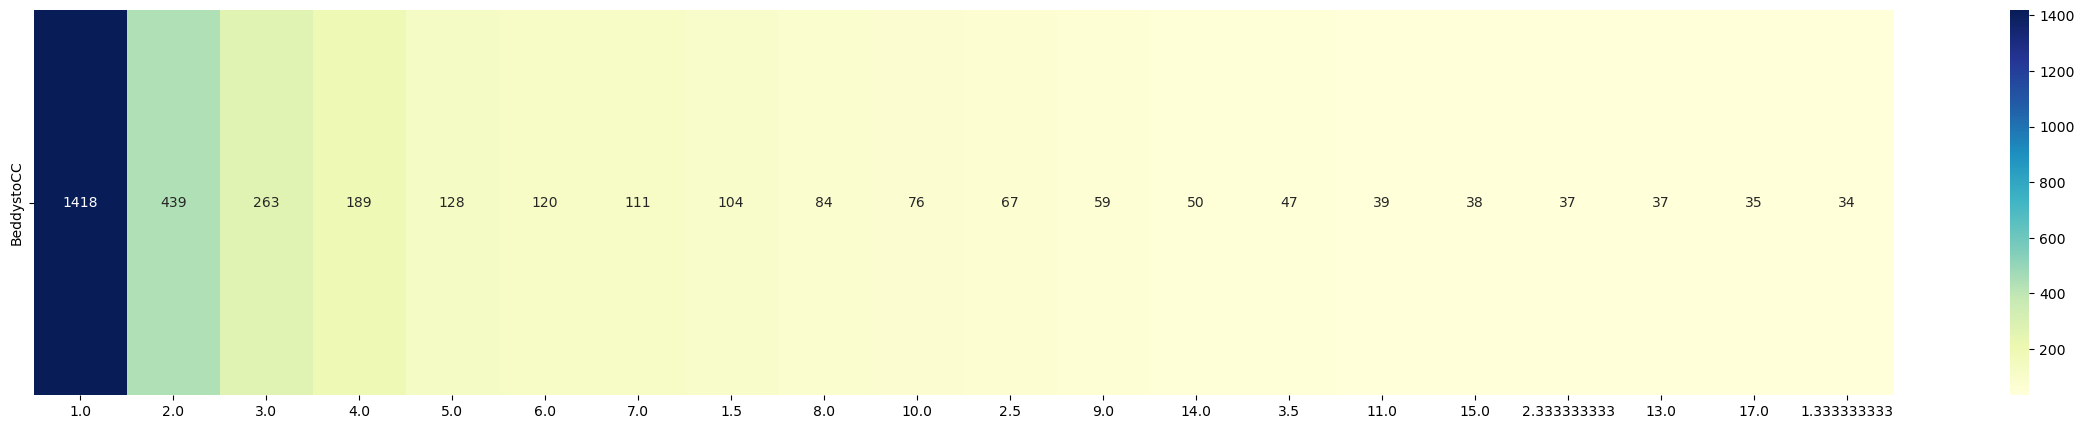

In [30]:

value_counts = filtered_data5['BeddystoCC'].value_counts()

N = 20
top_values = value_counts.nlargest(N)

heatmap_data = pd.DataFrame(top_values).T

plt.figure(figsize=(30, 5)) 

sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

plt.show()

In [31]:
filtered_data5['Bed_days_category'] = np.where(filtered_data5['BeddystoCC'] >= 7, 1, 0)
filtered_data5['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2410/2450149329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data5['Bed_days_category'] = np.where(filtered_data5['BeddystoCC'] >= 7, 1, 0)


0    3957
1    2129
Name: Bed_days_category, dtype: int64

In [32]:
from xgboost import XGBClassifier

X = filtered_data5[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'BedDys',
                   'CovidPrd' ]]



y = filtered_data5['Bed_days_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.8708206686930091
0.889751552795031
0.880184331797235
[[1097   85]
 [  71  573]]
0    3957
1    2129
Name: Bed_days_category, dtype: int64
0.9145673603504929


# REGRESION Car Driver

In [33]:
import xgboost as xgb
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()


X = filtered_data[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'BedDys',
                   'CovidPrd' ]]

y = filtered_data['BeddystoCC']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



xgb_model = xgb.XGBRegressor(
    n_estimators=20,
    
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October    

In [34]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
pred = xgb_model.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, pred)
print(f"R^2: {r2:.2f}")

RMSE: 5.73
MAE: 2.24
R^2: 0.56


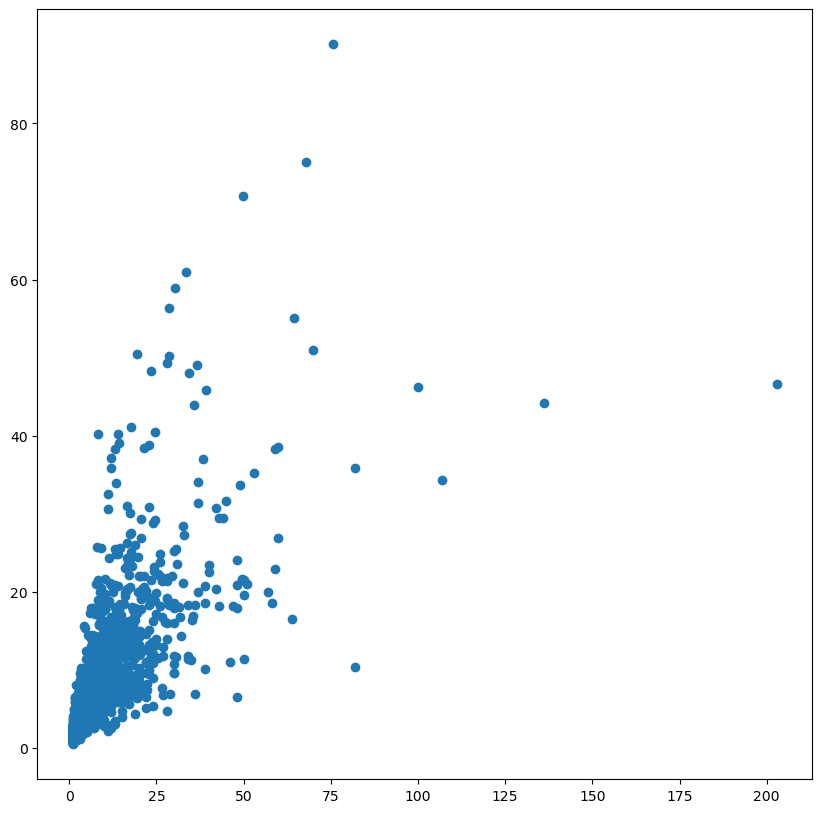

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))

_ = ax.scatter(y_test, pred)


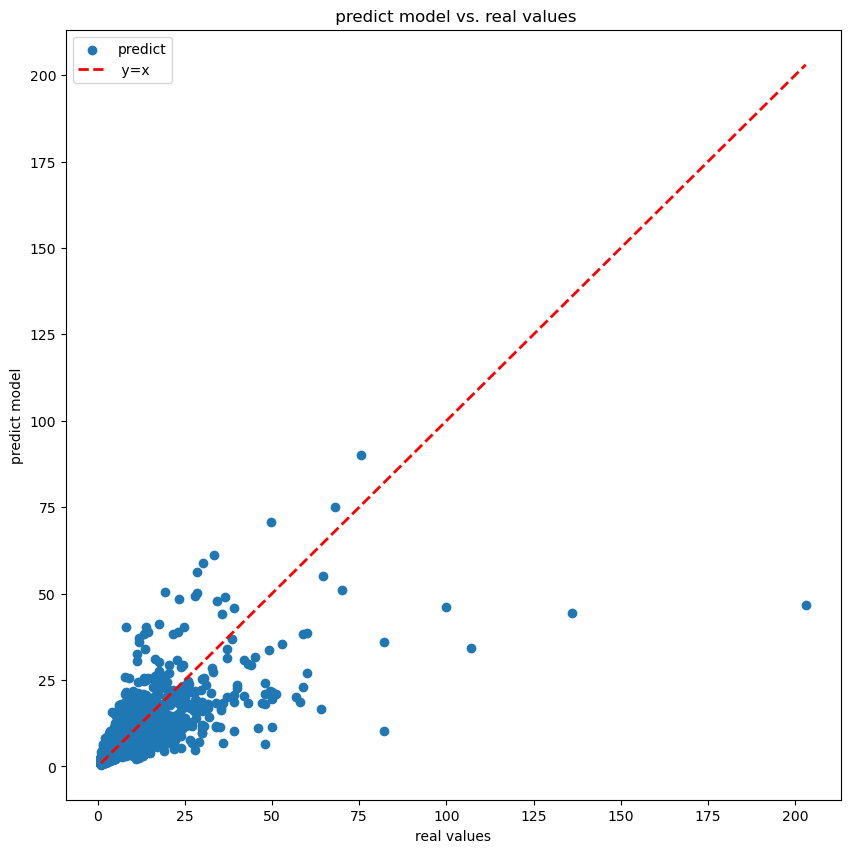

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

_ = ax.scatter(y_test, pred, label='predict')

ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label=' y=x')

ax.legend()

ax.set_title(' predict model vs. real values')
ax.set_xlabel('real values')
ax.set_ylabel('predict model')

plt.show()


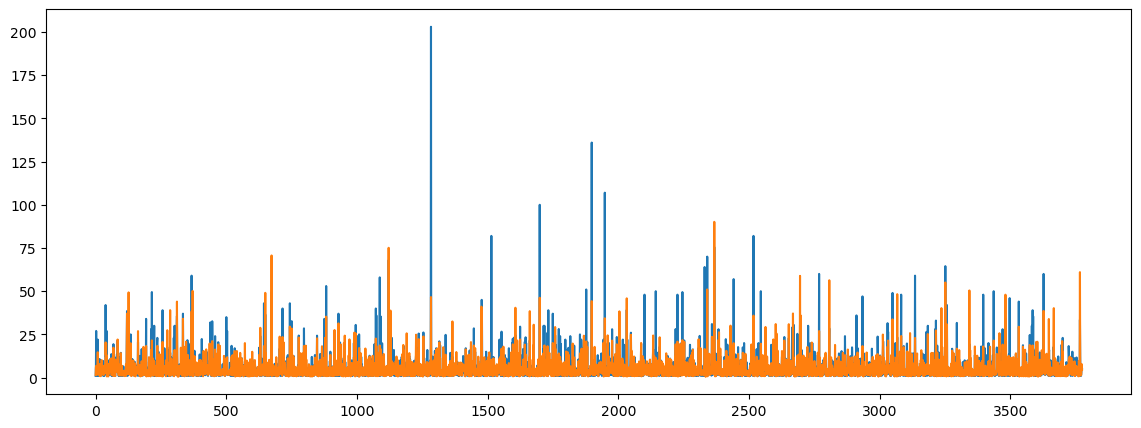

In [39]:
fig, ax = plt.subplots(figsize=(14, 5))

_ = ax.plot(range(len(y_test)), y_test)

_ = ax.plot(range(len(y_test)), pred)

In [40]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3)

xgb_model = xgb.XGBRegressor(n_estimators=20)
xgb_model.fit(x_train, y_train)

pred = xgb_model.predict(x_test)

rmse = mean_squared_error(y_test, pred, squared=False)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

RMSE: 2.74
MAE: 1.55
R^2: 0.70


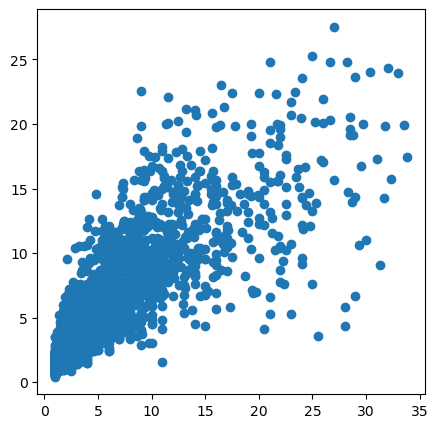

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, pred)


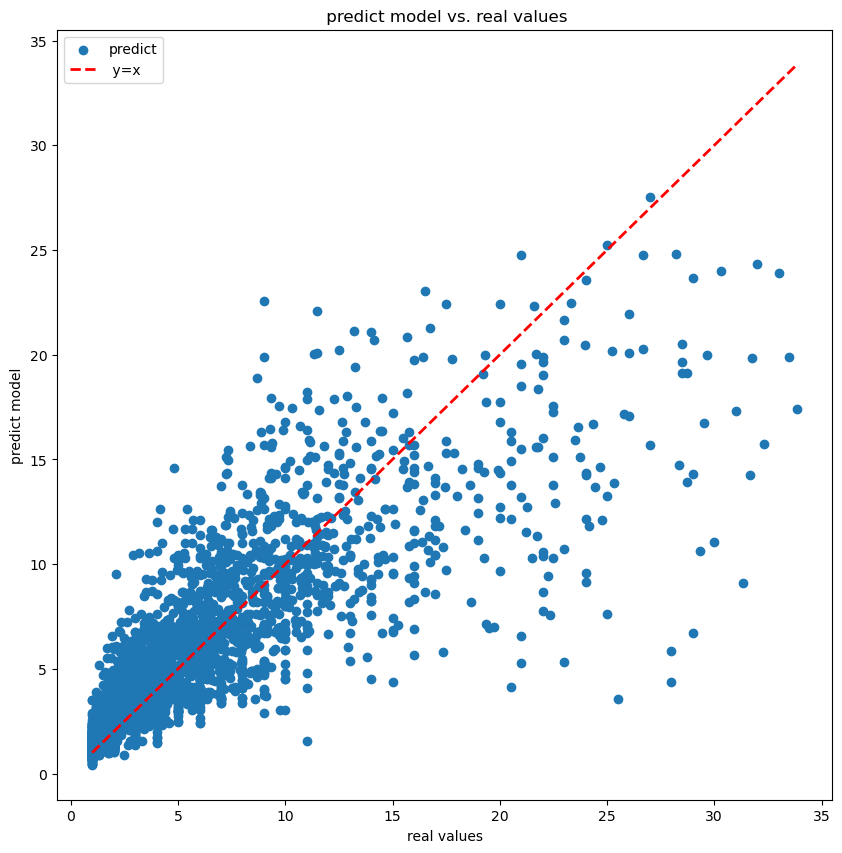

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

_ = ax.scatter(y_test, pred, label='predict')

ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label=' y=x')

ax.legend()

ax.set_title(' predict model vs. real values')
ax.set_xlabel('real values')
ax.set_ylabel('predict model')

plt.show()

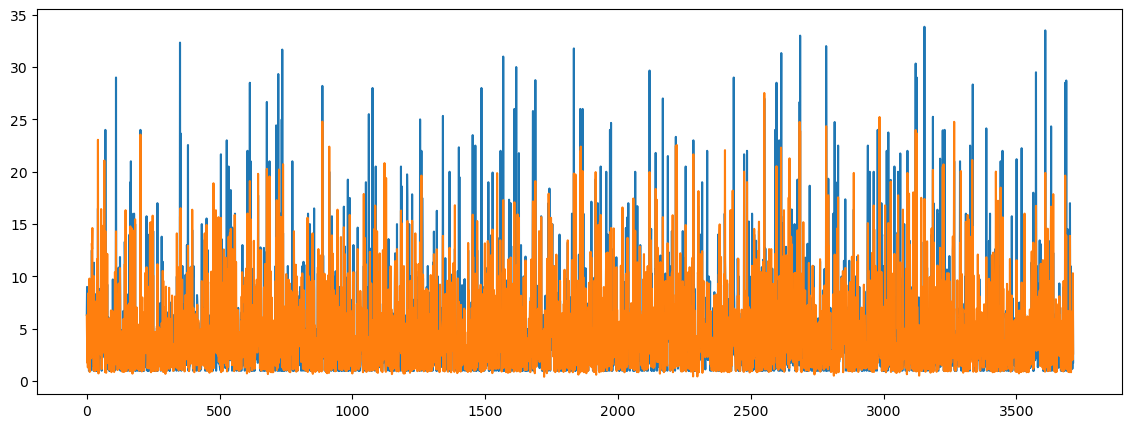

In [43]:
fig, ax = plt.subplots(figsize=(14, 5))

_ = ax.plot(range(len(y_test)), y_test)

_ = ax.plot(range(len(y_test)), pred)